<a href="https://colab.research.google.com/github/NodiraTillayeva/ERA5Analysis/blob/main/LeafMapNetCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install necessary libraries
!pip install leafmap xarray folium rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.17.3
    Uninstalling jsonschema-4.17.3:
      Successfully uninstalled jsonschema-4.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
flask-restx 1.2.0 requires jsonschema<=4.17.3, but you have jsonschema 4.20.0 which is incompatible.


In [2]:
!pip install "werkzeug<3.0.0,!=2.0.0"

In [3]:
!pip install localtileserver

  Using cached jsonschema-4.17.3-py3-none-any.whl (90 kB)
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.20.0
    Uninstalling jsonschema-4.20.0:
      Successfully uninstalled jsonschema-4.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.


In [48]:
# Import necessary libraries
import leafmap.foliumap as leafmap
import xarray as xr
import rioxarray
import localtileserver  # Import localtileserver
import tempfile

In [5]:
ds = xr.open_dataset('/content/highVeg.nc')

In [8]:
variable = 'lai_hv'  # replace with your variable name

In [10]:
# Convert the selected data to a raster format using rioxarray
data_to_plot = ds[variable]
data_to_plot = data_to_plot.rio.write_crs("epsg:4326")

In [19]:
# Save the data to a TIFF file
tiff_filename = "output.tif"
data_to_plot.rio.to_raster(tiff_filename)

In [20]:
# Create a Leafmap Map
m = leafmap.Map()

In [14]:
!apt-get install memcached
!pip install python-memcached

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  libanyevent-perl libcache-memcached-perl libmemcached libterm-readkey-perl libyaml-perl
The following NEW packages will be installed:
  memcached
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 210 kB of archives.
After this operation, 609 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 memcached amd64 1.6.14-1ubuntu0.1 [210 kB]
Fetched 210 kB in 1s (246 kB/s)
Selecting previously unselected package memcached.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../memcached_1.6.14-1ubuntu0.1_amd64.deb ...
Unpacking memcached (1.6.14-1ubuntu0.1) ...
Setting up memcached (1.6.14-1ubuntu0.1) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Created symlink /etc/systemd/system/multi-user.targ

In [36]:
# Add the TIFF layer to the map
m.add_raster('/content/output.tif', layer_name=variable, colormap="viridis")

In [32]:
!pip install rasterio

Width: 172, Height: 85
CRS: EPSG:4326
Bounds: BoundingBox(left=55.94000169408252, bottom=37.130000296093165, right=73.13999632227491, top=45.6300018401373)


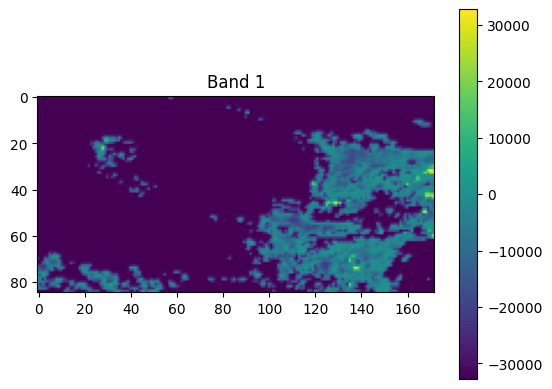

In [33]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIFF file
with rasterio.open('/content/output.tif') as src:
    # Read the first band
    band1 = src.read(1)

    # Show basic information about the raster
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"CRS: {src.crs}")
    print(f"Bounds: {src.bounds}")

    # Plotting the first band
    plt.imshow(band1, cmap='viridis')
    plt.colorbar()
    plt.title('Band 1')
    plt.show()


In [46]:
import leafmap.foliumap as leafmap

# Create a Leafmap map with specific center and zoom
m = leafmap.Map(center=[50, 50], zoom=10)  # Replace 'lat' and 'lon' with the coordinates relevant to your raster

try:
    m.add_raster('/content/output.tif', layer_name="asd Layer")
except Exception as e:
    print(f"Error adding raster to map: {e}")

# Display the map
m